# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [Online_Retail.csv](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv) from the folder.

In [2]:
online_rt=pd.read_csv("Online_Retail.csv",encoding="unicode_escape")

### Step 3. Assign it to a variable called online_rt

In [3]:
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

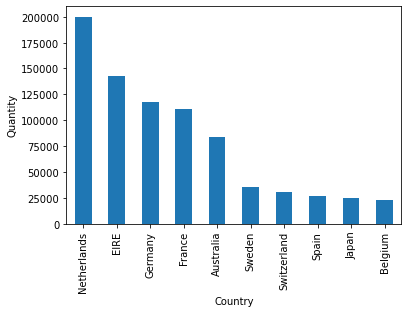

In [4]:
countries=online_rt.groupby("Country").sum()
countries=countries.sort_values(by="Quantity",ascending=False)[1:11]
countries["Quantity"].plot(kind="bar")
plt.ylabel("Quantity")
plt.show()

### Step 5.  Exclude negative Quatity entries

In [5]:
df=online_rt[online_rt.Quantity>0].reset_index(drop=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
531280,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
531281,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
531282,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
531283,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

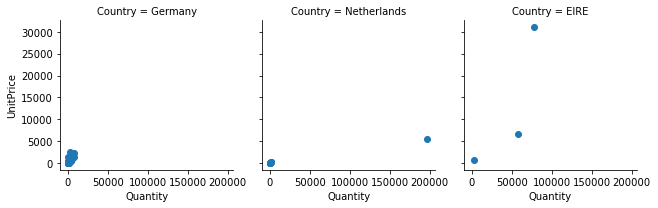

In [6]:
customers = online_rt.groupby(['CustomerID','Country']).sum()

# there is an outlier with negative price
customers = customers[customers.UnitPrice > 0]

# get the value of the index and put in the column Country
customers['Country'] = customers.index.get_level_values(1)

# top three countries
top_countries =  ['Netherlands', 'EIRE', 'Germany']

# filter the dataframe to just select ones in the top_countries
customers = customers[customers['Country'].isin(top_countries)]

g = sns.FacetGrid(customers, col="Country")

g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

# adds legend
g.add_legend()